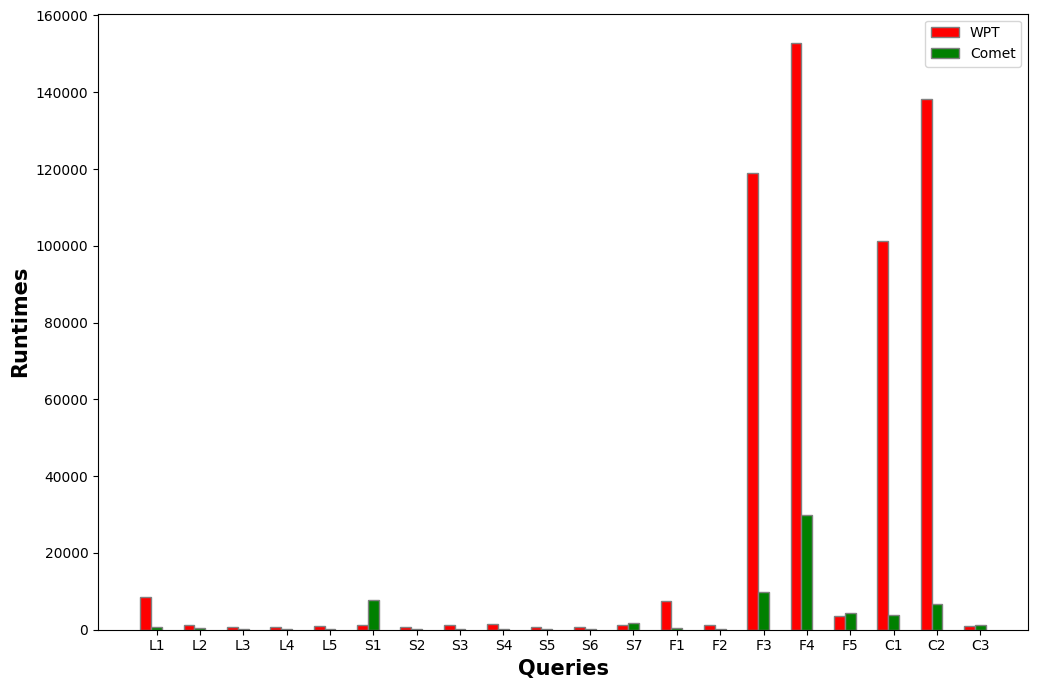

In [20]:
import matplotlib.pyplot as plt
import numpy as np
file=open("result.txt","r")
queries_original=[]
queries_converted=[]
file.readline()
for line in file.readlines():
    number=int(line.split(";")[0].replace("\n",""))
    if number>9 and number<30:
        original=int(line.split(";")[1])
        converted=int(line.split(";")[2].replace("\n",""))


        queries_converted.append(converted)
        queries_original.append(original)


barWidth=0.25
fig=plt.subplots(figsize=(12,8))



br1=np.arange(len(queries_original))
br2=[x+barWidth for x in br1]

plt.bar(br1,queries_original,color='r',width=barWidth,edgecolor='grey',label='original')

plt.bar(br2,queries_converted,color='g',width=barWidth,edgecolor='grey',label='Converted')

plt.xlabel('Queries',fontweight='bold',fontsize=15)
plt.ylabel('Runtimes',fontweight='bold',fontsize=15)
xticks=["L1","L2","L3","L4","L5","S1","S2","S3","S4","S5","S6","S7","F1","F2","F3","F4","F5","C1","C2","C3"]
plt.xticks([r+barWidth for r in range(len(queries_original))],[xticks[r] for r in range(len(xticks))])

plt.legend(["WPT","Comet"])
plt.show()


The basic Testing use case is a collection of 20 predefined query templates with basic WatDiv. These query templates can be categorized into four groups based on their shapes: star (S), linear (L), snowflake (F), and complex (C). To determine the solution's performance, we run the queries {x} times and take the average runtimes. 
We can see from this graph our solution outperforms WPT by several orders of magnitude for all categories. In order to deeply analyze the reason, we need to look at each of the shapes separately and give our input on them. 

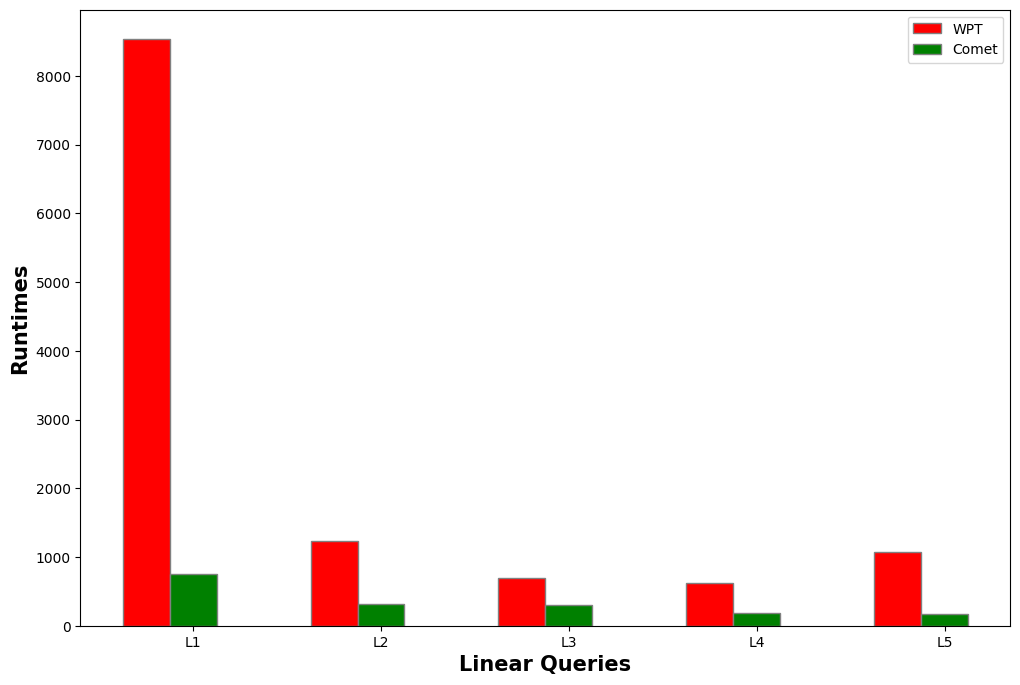

In [14]:
linears_original=queries_original[0:5]
linears_converted=queries_converted[0:5]


barWidth=0.25
fig=plt.subplots(figsize=(12,8))



br1=np.arange(len(linears_original))
br2=[x+barWidth for x in br1]

plt.bar(br1,linears_original,color='r',width=barWidth,edgecolor='grey',label='original')

plt.bar(br2,linears_converted,color='g',width=barWidth,edgecolor='grey',label='Converted')

plt.xlabel('Linear Queries',fontweight='bold',fontsize=15)
plt.ylabel('Runtimes',fontweight='bold',fontsize=15)
xticks=["L1","L2","L3","L4","L5"]
plt.xticks([r+barWidth for r in range(len(linears_original))],[xticks[r] for r in range(len(xticks))])

plt.legend(["WPT","Comet"])
plt.show()



In linear queries, we see at least four times difference in the query runtime. This difference comes from the input size of each joined table. In our algorithm, we are trying to decreasing the sparsity of the table (reducing null values). By means of reducing input size of the WPT table we are also improving the scan time as well. But there is an interesting aspect while comparing the linear queries of L1 with others. L1 performs better than others while at the same time being the subpattern for them. The reason is in the underlying data. So in the first query, we have used org: caption as the second join condition, which has only 0.0002 selectivitiy. In our solution, since this predicate has been used as a separate VP table, we have significantly reduced the size of the second table. But in all other cases joined table doesn't have such low selectivity.

has very low selectivty (only few subjects have the value for this predict)



1185


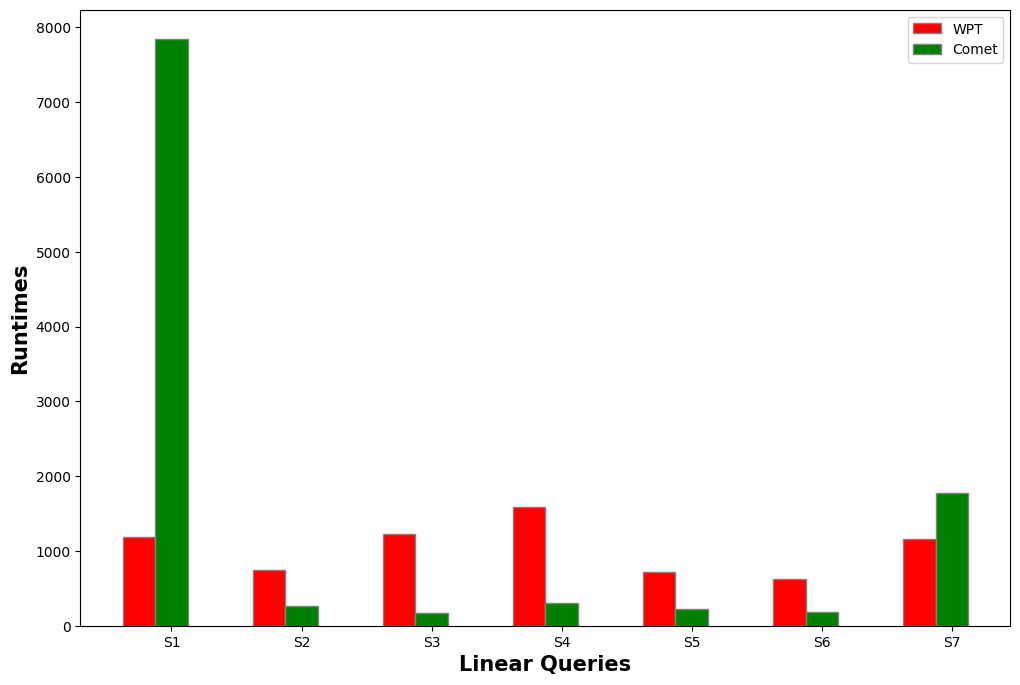

In [16]:
print(queries_original[5])
star_original=queries_original[5:12]
star_converted=queries_converted[5:12]


barWidth=0.25
fig=plt.subplots(figsize=(12,8))



br1=np.arange(len(star_original))
br2=[x+barWidth for x in br1]

plt.bar(br1,star_original,color='r',width=barWidth,edgecolor='grey',label='original')

plt.bar(br2,star_converted,color='g',width=barWidth,edgecolor='grey',label='Converted')

plt.xlabel('Linear Queries',fontweight='bold',fontsize=15)
plt.ylabel('Runtimes',fontweight='bold',fontsize=15)
xticks=["S1","S2","S3","S4","S5","S6","S7"]
plt.xticks([r+barWidth for r in range(len(star_original))],[xticks[r] for r in range(len(xticks))])

plt.legend(["WPT","Comet"])
plt.show()

In star queries, we see that our solution is not so perfect. That is normal in one sense. WPT tables are optimized primarily for star queries, and to retrieve stars, you don't need to do any join. However, our optimized schema needs to have multiple joins in order to retrieve the same result. This figure shows that  our solution is still outperforms in 5 out of 7 cases. The underlying reason is that the size of the stars is not so big enough that splitting the predicate into the different tables and keeping them in the same table doesn't have a huge difference.

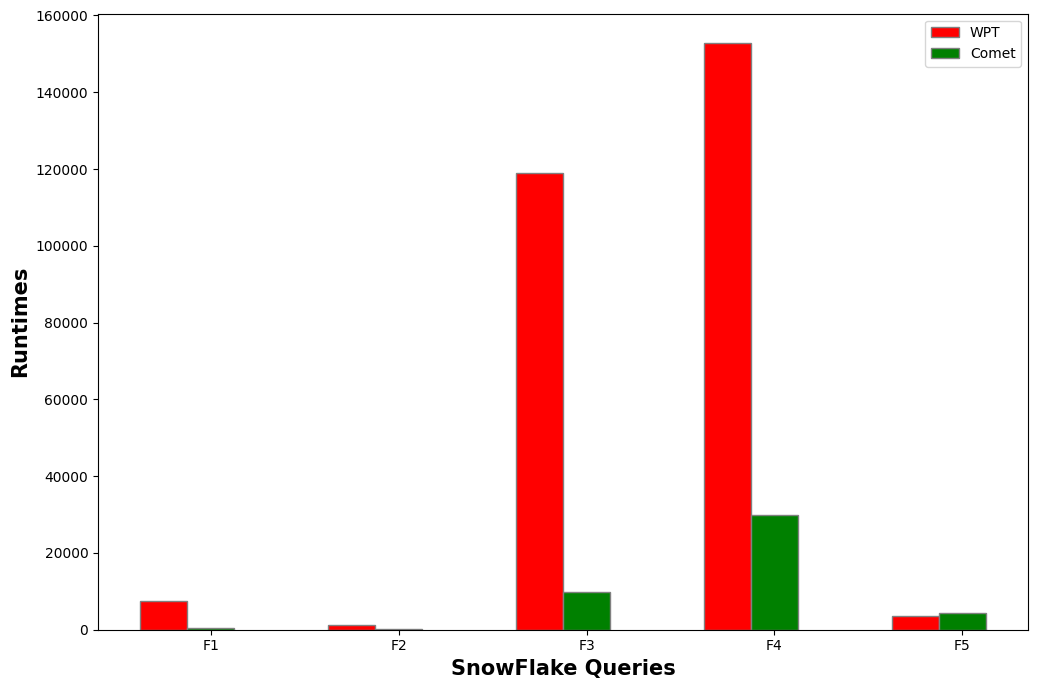

In [18]:
flake_original=queries_original[12:17]
flake_converted=queries_converted[12:17]


barWidth=0.25
fig=plt.subplots(figsize=(12,8))



br1=np.arange(len(flake_original))
br2=[x+barWidth for x in br1]

plt.bar(br1,flake_original,color='r',width=barWidth,edgecolor='grey',label='original')

plt.bar(br2,flake_converted,color='g',width=barWidth,edgecolor='grey',label='Converted')

plt.xlabel('SnowFlake Queries',fontweight='bold',fontsize=15)
plt.ylabel('Runtimes',fontweight='bold',fontsize=15)
xticks=["F1","F2","F3","F4","F5"]
plt.xticks([r+barWidth for r in range(len(flake_original))],[xticks[r] for r in range(len(xticks))])



plt.legend(["WPT","Comet"])
plt.show()

Since snowflake is a more complex version of the star and linear queries, that is why we need to consider different scenarios. Our sample can easily show that the WPT schema is not performing well against our schema. If we look at some edge cases, such as F3 and F4, we can see that there is a subquery and filter that has been used against a huge wide property table which creates a bottleneck in the execution time.

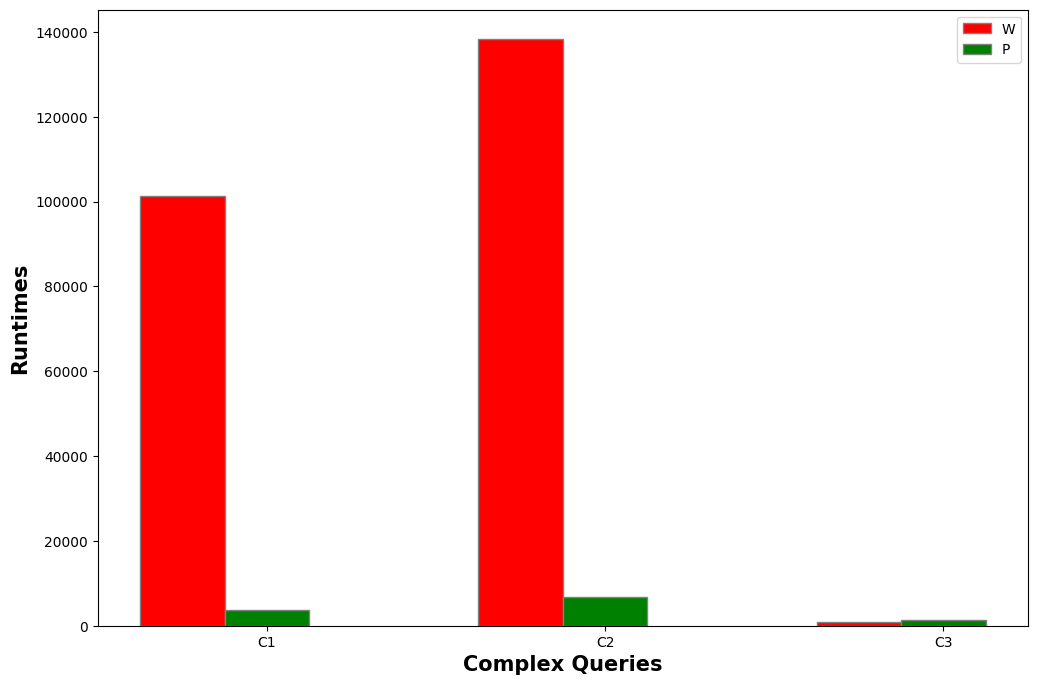

In [19]:
complex_original=queries_original[17:20]
complex_converted=queries_converted[17:20]


barWidth=0.25
fig=plt.subplots(figsize=(12,8))



br1=np.arange(len(complex_original))
br2=[x+barWidth for x in br1]

plt.bar(br1,complex_original,color='r',width=barWidth,edgecolor='grey',label='original')

plt.bar(br2,complex_converted,color='g',width=barWidth,edgecolor='grey',label='Converted')

plt.xlabel('Complex Queries',fontweight='bold',fontsize=15)
plt.ylabel('Runtimes',fontweight='bold',fontsize=15)
xticks=["C1","C2","C3"]
plt.xticks([r+barWidth for r in range(len(complex_original))],[xticks[r] for r in range(len(xticks))])

plt.legend("WPT")
plt.show()

A significant difference comes when the query is complex. It means a lot of joins and filter conditions that can be overwhelmed the system. In this graph, we can see a huge difference in terms of the runtime. The main difference is coming from using self-joined in the WPT table, which is quite a big table. If we look at the graph, we can see one anomaly, which, although queries C1 and C2 have significant improvement, however, C3 is almost at the same level. This huge difference is the structure of the C3 which is entirely close to the Star schema. Since it retrieves huge property values, it is considered a complex query.

An conclusion, since we have analyzed 4 different shapes of the query, our schema is significantly overperformed in 3/4 of them. Our schema is mostly concentrated on increasing the sparsity of the WPT tables by means of creating small tables, which leads to increasing table scan time. This is very important, as we can see from the above samples. 
However, there are disadvantages to this schema as well. The first and most important disadvantage is increasing joins in the query workload. It is even getting worse when all the properties in the query are coming from different tables. We have tried to get all the properties from the Watdiv dataset, and the result was at least 100 times worse. But in the real-life probability of this case is significantly less. Secondly, the newly created tables don't have proper names, which could lead to time waste when we want to create a new query from scratch. We have developed a solution for converting existing wide property table queries to the newly generated schema, which could help to migrate the queries efficiently and fast.

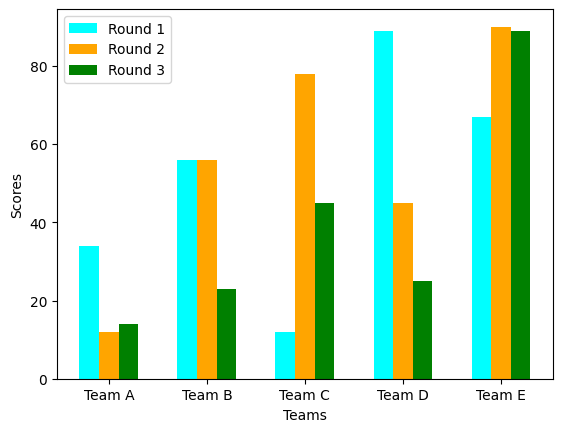

In [3]:
import numpy as np
  
# create data
x = np.arange(5)
y1 = [34, 56, 12, 89, 67]
y2 = [12, 56, 78, 45, 90]
y3 = [14, 23, 45, 25, 89]
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['Team A', 'Team B', 'Team C', 'Team D', 'Team E'])
plt.xlabel("Teams")
plt.ylabel("Scores")
plt.legend(["Round 1", "Round 2", "Round 3"])
plt.show()